In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic-survival/train (2).csv
/kaggle/input/titanic-survival/test (2).csv


# Importing dataset

In [2]:
df=pd.read_csv("/kaggle/input/titanic-survival/train (2).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Deleting unnecessary columns


In [5]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [6]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# Encoding


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
df['Sex']=le.fit_transform(df['Sex'])

In [10]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

# Handling null values

Hist Gradient Boosting to fill null values in Age column


In [13]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [14]:
def regression_imputer(ds):
    ds_copy = df.copy()
    for column in ds_copy.columns:
        if ds_copy[column].isnull().sum()>0:
            
            known = ds_copy[column].notnull()
            unknown = ds_copy[column].isnull()
            
            xtrain = ds_copy[known].drop(column,axis=1)
            ytrain = ds_copy[known][column]
            
            model = HistGradientBoostingRegressor()
            model.fit(xtrain,ytrain)
            
            # predicting missing values
            
            xtest = ds_copy[unknown].drop(column,axis=1)
            ypred = model.predict(xtest)
            
            ds.loc[unknown,column] = ypred
    
    return ds
df = regression_imputer(df)

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Train test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape,X_test.shape

((712, 7), (179, 7))

# Plots

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

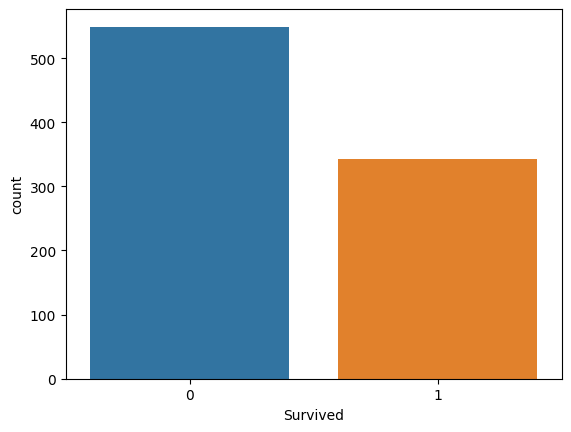

In [22]:
sns.countplot(x = df['Survived'])

<Figure size 1000x800 with 0 Axes>

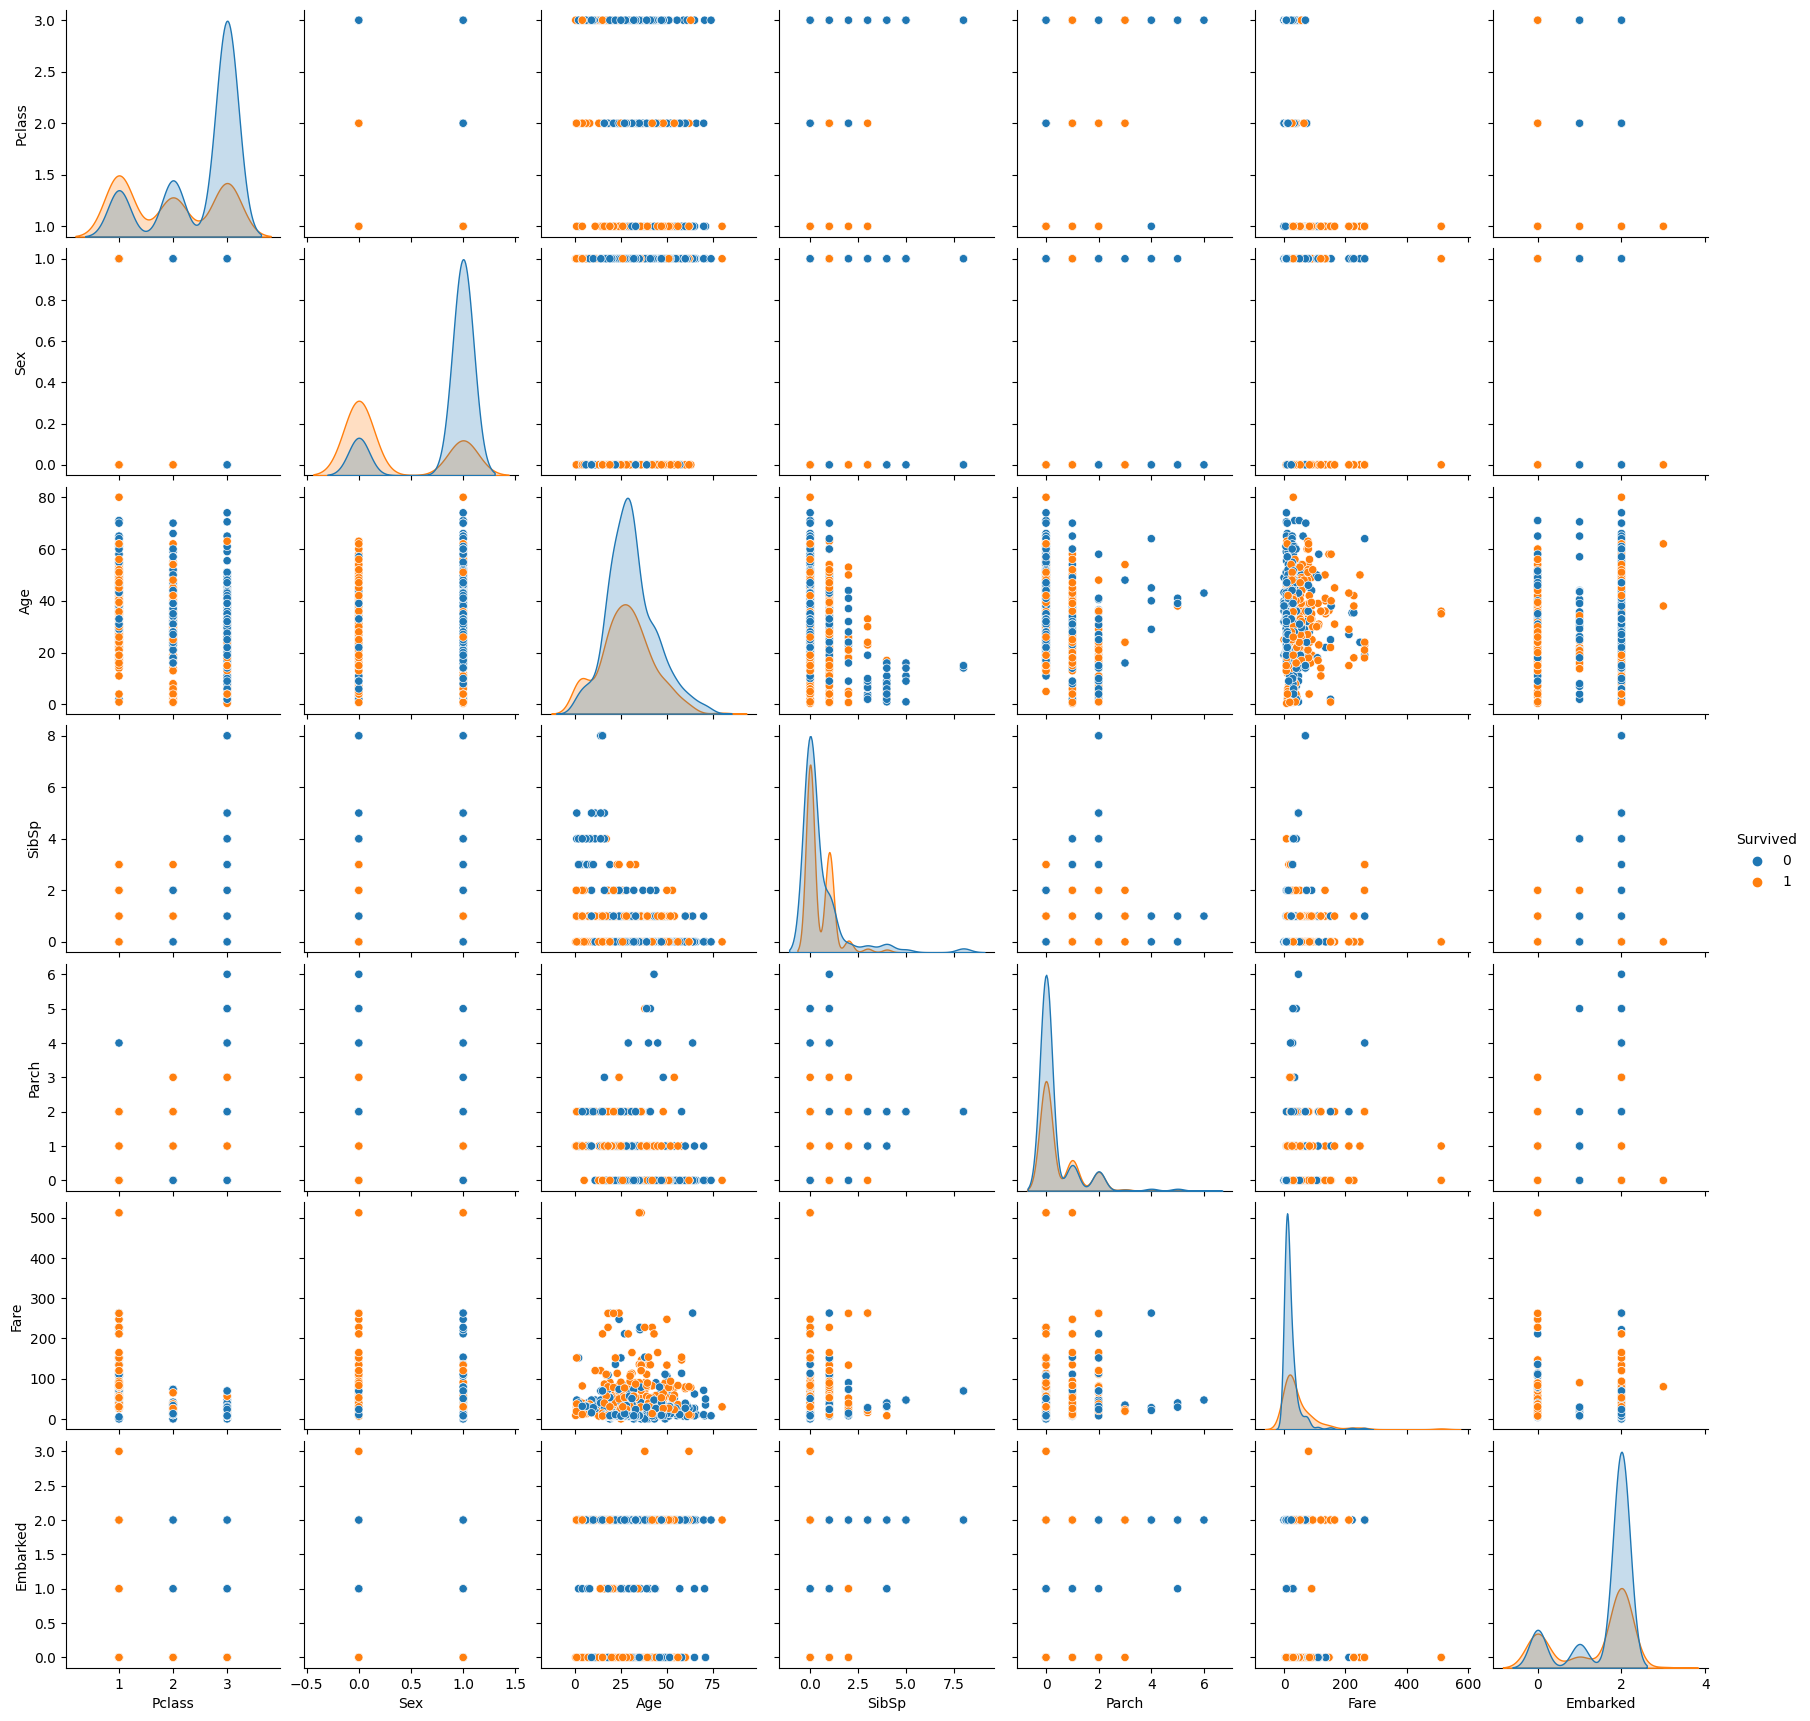

In [23]:
cor=X.corrwith(y)
plt.figure(figsize=(10,8))
sns.pairplot(df,hue='Survived')

# ML model

Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
stc=DecisionTreeClassifier()

In [25]:
from sklearn import tree
stc.fit(X_train,y_train)


DecisionTreeClassifier()

In [26]:
y_pred_stc=stc.predict(X_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_stc,y_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       101
           1       0.77      0.73      0.75        78

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()


In [29]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred_rfc=rfc.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       106
           1       0.84      0.85      0.84        73

    accuracy                           0.87       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.87      0.87      0.87       179



Gaussian NB

In [32]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB()

In [33]:
y_pred_gaus = model.predict(X_test)

In [34]:
print(classification_report(y_pred_gaus,y_test))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        99
           1       0.77      0.71      0.74        80

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



# Hyperparameter tuning

In [35]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [36]:
from sklearn.model_selection import GridSearchCV


In [37]:
# Hyperparameter Optimization
parameters = {'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'class_weight': [None, 'balanced', 'balanced_subsample']}
# Run the grid search
grid_obj = GridSearchCV(rfc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfr= grid_obj.best_estimator_

# Train the model using the training sets 
rfr.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [38]:
rfr_hyper_predict=rfr.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(rfr_hyper_predict,y_test))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       110
           1       0.81      0.87      0.84        69

    accuracy                           0.87       179
   macro avg       0.86      0.87      0.87       179
weighted avg       0.87      0.87      0.87       179



# Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=rfr,X=X_train,y=y_train,cv=10)
print("Accuracy for Radom forest classifier after cross validation: ",accuracy.mean()*100)

Accuracy for Radom forest classifier after cross validation:  82.16549295774648
